In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib  import cm

#from matplotlib.colors import TwoSlopeNorm

datadir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteDumbbells/Data_and_Figures/Fig_Pathways/Data/'
plotsdir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteDumbbells/Data_and_Figures/Fig_StatesTime/Plots/'

# plotting pathway

12.69632382179961
61.970694203050414


Text(0.5, 0, 'Time [$\\Delta T$]')

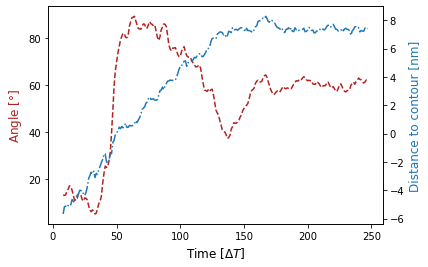

In [2]:

fig,ax = plt.subplots()
seeds = "6 10 7 6 8".split()
rad9722 = 25.331
rad4322 = 17.075
for i in range(1):
    d1 = pandas.read_csv(datadir + "pathwaysMass30LargeVesc/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5.dat", header = None, sep=' ')[2]
    te1 = pandas.read_csv(datadir + "pathwaysMass30LargeVesc/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5.dat", header = None, sep=' ')[1]
    d2 = pandas.read_csv(datadir + "pathwaysMass30LargeVesc/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5_re.dat", header = None, sep=' ')[2]
    te2 = pandas.read_csv(datadir + "pathwaysMass30LargeVesc/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5_re.dat", header = None, sep=' ')[1]
    d = np.append(d1,d2)
    te = np.append(te1,te2)
    distance = []
    theta = []
    thetaNEW = []
    for j in range(len(d)):
        if d[j]< 32 and d[j]> 12: #dumbbell either inside of outside membrane, not attached
            distance.append(rad9722-d[j])
            theta.append(180-te[j]*180/np.pi)
            
    z = np.arange(len(distance))
    last_int = len(theta)
    thetaNEW = np.zeros((last_int))
    print(theta[0])
    print(theta[last_int-1])
    for t in range(8,last_int):
        if t == 8:
            thetaNEW[t] = theta[t]
        elif t == 9:
            thetaNEW[t] = np.mean([theta[t], theta[t+1]])
        elif t == last_int-1:
            thetaNEW[t] = theta[t]
        elif t == last_int-2:
            thetaNEW[last_int-2] = np.mean([theta[last_int-1], theta[last_int-2]])
        else:
            thetaNEW[t] = np.mean([theta[t+1],theta[t], theta[t-1]])
    ax.plot(z[8:],thetaNEW[8:],linestyle = '--', color = 'firebrick', label = 'seed'+str(seeds[i]))
    #ax.plot(z[8:],theta[8:],linestyle = '--', color = 'firebrick', label = 'seed'+str(seed))
    ax2=ax.twinx()
    ax2.plot(z[8:],distance[8:],linestyle = '-.', color = 'tab:blue')
ax.set_ylabel(r"Angle [$\degree$]", color = 'firebrick', fontsize = 12)
ax2.set_ylabel(r"Distance to contour [nm]", color = 'tab:blue', fontsize = 12)#"($ \mu m$)")
ax.set_xlabel(r"Time [$\Delta T$]", fontsize = 12)#"($ \mu m$)")
#fig.savefig("./plots/withMass/VerticleAngleTime4.pdf")
#fig.savefig("./plots/withMass/HorizontalAngleTime10.pdf")

6
[32, 43, 47, 27]
[23, 7, 7, 27]


Text(0, 0.5, 'Time [$1000\\Delta T$]')

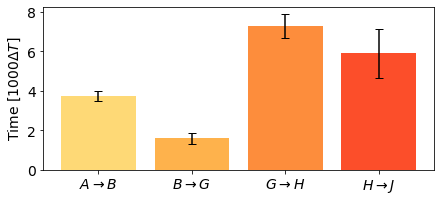

In [3]:

fig,ax = plt.subplots(figsize = (7,3))
seeds = "3 4 6 7 8 9 10 11 13 19".split()
tauAB = []
tauBG = []
tauGH = []
tauHJ = []
for i in range(4):
    d1 = pandas.read_csv(datadir + "pathwaysMass30LargeVesc/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5.dat", header = None, sep=' ')[2]
    te1 = pandas.read_csv(datadir + "pathwaysMass30LargeVesc/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5.dat", header = None, sep=' ')[1]
    d2 = pandas.read_csv(datadir + "pathwaysMass30LargeVesc/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5_re.dat", header = None, sep=' ')[2]
    te2 = pandas.read_csv(datadir + "pathwaysMass30LargeVesc/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5_re.dat", header = None, sep=' ')[1]
    d = np.append(d1,d2)
    te = np.append(te1,te2)
    distance = []
    theta = []
    for j in range(len(d)):
        if d[j]< 32 and d[j]> 12: #dumbbell either inside of outside membrane, not attached
            distance.append(rad9722-d[j])
            theta.append(180-te[j]*180/np.pi)
    #print(distance)
    
    z = np.arange(len(distance))
    last_int = len(theta)
    
#------------- State A is at time = 8, let's fetch where state B is-------------------#
    for t in range(0,last_int):
        if theta[t] > 40:
            stateBtime = t
            break
#------------- let's fetch where state G is-------------------#
    for t in range(stateBtime,last_int):
        if theta[t] > 80:
            stateGtime = t
            break
#------------- let's fetch where state H is-------------------#
    for t in range(stateGtime,last_int):
        if distance[t]>6:
            stateHtime = t
            break
        if t == last_int-1:
            print(seeds[i])
            stateHtime = last_int-1
#------------- let's fetch where state J is-------------------#
    for t in range(stateHtime,last_int):
        if distance[t]>8.5:
            stateJtime = t
            break
        if t == last_int-1:
            print(seeds[i])
            stateJtime = last_int-1
    
    
    tauAB.append(stateBtime-0)
    tauBG.append(stateGtime-stateBtime)
    tauGH.append(stateHtime-stateGtime)
    tauHJ.append(stateJtime-stateHtime)
    
print(tauAB)    
print(tauBG)    
avtauAB = np.mean(tauAB)
avtauBG = np.mean(tauBG)
avtauGH = np.mean(tauGH)
avtauHJ = np.mean(tauHJ)

stdtauAB = np.std(tauAB)/np.sqrt(len(seeds))
stdtauBG = np.std(tauBG)/np.sqrt(len(seeds))
stdtauGH = np.std(tauGH)/np.sqrt(len(seeds))
stdtauHJ = np.std(tauHJ)/np.sqrt(len(seeds))
clrs = ["#ffffcc","#ffeda0","#fed976","#feb24c","#fd8d3c","#fc4e2a","#e31a1c", 'tomato','goldenrod','firebrick']
ax.bar(0,avtauAB, yerr = stdtauAB,capsize=4.0, color = clrs[2], label = r'$A->B$')
ax.bar(1,avtauBG, yerr = stdtauBG,capsize=4.0, color = clrs[3], label = r'$\Delta\tau_{\mathrm{BG}}$')
ax.bar(2,avtauGH, yerr = stdtauGH,capsize=4.0, color = clrs[4], label = r'$\Delta\tau_{\mathrm{GH}}$')
ax.bar(3,avtauHJ, yerr = stdtauHJ,capsize=4.0, color = clrs[5], label = r'$\Delta\tau_{\mathrm{HJ}}$')
ax.set_xticks([0,1,2,3])
ax.set_yticks([0,20,40,60,80])
ax.set_yticklabels([0,2,4,6,8],fontsize = 14)
#ax.set_xticklabels([r'$A \rightarrow B$',r'$B \rightarrow G$',r'$G \rightarrow H$',r'$\Delta\tau_{\mathrm{HJ}}$' ], fontsize = 12)
ax.set_xticklabels([r'$A \rightarrow B$',r'$B \rightarrow G$',r'$G \rightarrow H$',r'$H \rightarrow J$' ], fontsize = 14)
ax.set_ylabel(r'Time [$1000\Delta T$]', fontsize = 14)
#fig.savefig('./plots/Anisotropic_particles_paper/TimeBetwStatesVerticle.pdf')

37
28
33
37
39
30
28
38
32


Text(0, 0.5, 'Time [1000$\\Delta T$]')

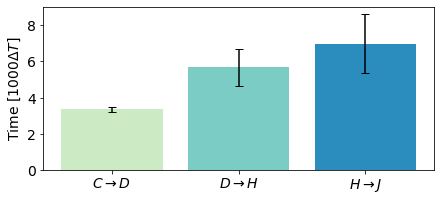

In [4]:
fig,ax = plt.subplots(figsize = (7,3))
seeds = "10 6 7 8 9 2 12 11 13".split()
tauCD = []
tauDH = []
tauHJ = []
tauJK = []
for i in range(9):
    d1 = pandas.read_csv(datadir + "pathwaysHorizMass30LargeVesc/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5.dat", header = None, sep=' ')[2]
    te1 = pandas.read_csv(datadir + "pathwaysHorizMass30LargeVesc/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5.dat", header = None, sep=' ')[1]
    d2 = pandas.read_csv(datadir + "pathwaysHorizMass30LargeVesc/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5_re.dat", header = None, sep=' ')[2]
    te2 = pandas.read_csv(datadir + "pathwaysHorizMass30LargeVesc/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5_re.dat", header = None, sep=' ')[1]
    d = np.append(d1,d2)
    te = np.append(te1,te2)
    distance = []
    theta = []
    for j in range(len(d)):
        if d[j]< 32 and d[j]> 12: #dumbbell either inside of outside membrane, not attached
            distance.append(rad9722-d[j])
            theta.append(180-te[j]*180/np.pi)
    
    z = np.arange(len(distance))
    last_int = len(theta)
    
#------------- State C is at time = 8, let's fetch where state D is-------------------#
    for t in range(8,last_int):
        if distance[t]>0:
            stateDtime = t
            break
#------------- let's fetch where state H is-------------------#
    for t in range(stateDtime,last_int):
        if theta[t] < 65:
            stateHtime = t
            break
#------------- let's fetch where state J is-------------------#
    for t in range(stateHtime,last_int):
        if distance[t]>8.5:
            stateJtime = t
            break
#------------- let's fetch where state K is-------------------#
    for t in range(stateJtime,last_int):
        if theta[t] > 60:
            stateKtime = t
            break
    print(stateDtime-8)
    
    tauCD.append(stateDtime-8)
    tauDH.append(stateHtime-stateDtime)
    tauHJ.append(stateJtime-stateHtime)
    tauJK.append(stateKtime-stateJtime)
    
avtauCD = np.mean(tauCD)
avtauDH = np.mean(tauDH)
avtauHJ = np.mean(tauHJ)
avtauJK = np.mean(tauJK)

stdtauCD = np.std(tauCD)/np.sqrt(len(tauCD))
stdtauDH = np.std(tauDH)/np.sqrt(len(tauCD))
stdtauHJ = np.std(tauHJ)/np.sqrt(len(tauCD))
stdtauJK = np.std(tauJK)/np.sqrt(len(tauCD))
clrs = ["#ccebc5","#7bccc4","#2b8cbe","#08589e"]

ax.bar(0,avtauCD, yerr = stdtauCD, capsize=4.0,color = clrs[0], label = r'$\Delta\tau_{\mathrm{CD}}$')
ax.bar(1,avtauDH, yerr = stdtauDH,capsize=4.0, color = clrs[1], label = r'$\Delta\tau_{\mathrm{DH}}$')
ax.bar(2,avtauHJ, yerr = stdtauHJ,capsize=4.0, color = clrs[2], label = r'$\Delta\tau_{\mathrm{HJ}}$')
#ax.bar(3,avtauJK, yerr = stdtauJK, color = 'teal', label = r'$\Delta\tau_{\mathrm{JK}}$')
ax.set_xticks([0,1,2])
ax.set_yticks([0,20,40,60,80])
ax.set_yticklabels([0,2,4,6,8],fontsize = 14)
#ax.set_xticklabels([r'$\Delta\tau_{\mathrm{CD}}$',r'$\Delta\tau_{\mathrm{DH}}$',r'$\Delta\tau_{\mathrm{HJ}}$',r'$\Delta\tau_{\mathrm{JK}}$' ], fontsize = 12)
ax.set_xticklabels([r'$C \rightarrow D$',r'$D \rightarrow H$',r'$H \rightarrow J$' ], fontsize = 14)
ax.set_ylabel(r'Time [1000$\Delta T$]', fontsize = 14)
#fig.savefig('./plots/Anisotropic_particles_paper/TimeBetwStatesHorizontal.pdf')

0.0912523289214846
85.46196380341416


Text(0.5, 0, 'Time [$\\Delta T$]')

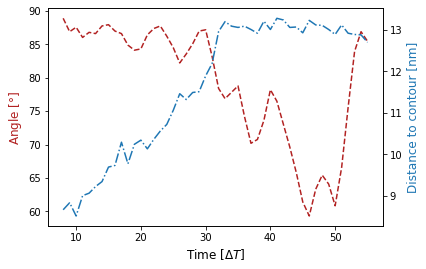

In [6]:
fig,ax = plt.subplots()
seeds = "29".split() #3 7 14 17 18 23 28 29 11, 13
rad9722 = 25.331
rad4322 = 17.075
for i in range(1):
    d = pandas.read_csv(datadir + "pathwaysInitRat/theta_d_0.15_3.0_"+str(seeds[i])+"_21_2.5.dat", header = None, sep=' ')[2]
    te = pandas.read_csv(datadir + "pathwaysInitRat/theta_d_0.15_3.0_"+str(seeds[i])+"_21_2.5.dat", header = None, sep=' ')[1]
    #d = pandas.read_csv(datadir + "pathwaysLargeVesc2/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5.dat", header = None, sep=' ')[2]
    #te = pandas.read_csv(datadir + "pathwaysLargeVesc2/theta_d_0.00_3.0_"+str(seeds[i])+"_5_7.5.dat", header = None, sep=' ')[1]
    distance = []
    theta = []
    thetaNEW = []
    for j in range(len(d)):
        if d[j]< 25.1 and d[j]> 12: #dumbbell either inside of outside membrane, not attached
            distance.append(rad9722-d[j])
            theta.append(180-te[j]*180/np.pi)
            
    z = np.arange(len(distance))
    last_int = len(theta)
    thetaNEW = np.zeros((last_int))
    print(theta[0])
    print(theta[last_int-1])
    for t in range(8,last_int):
        if t == 8:
            thetaNEW[t] = theta[t]
        elif t == 9:
            thetaNEW[t] = np.mean([theta[t], theta[t+1]])
        elif t == last_int-1:
            thetaNEW[t] = theta[t]
        elif t == last_int-2:
            thetaNEW[last_int-2] = np.mean([theta[last_int-1], theta[last_int-2]])
        else:
            thetaNEW[t] = np.mean([theta[t+1],theta[t], theta[t-1]])
    ax.plot(z[8:],thetaNEW[8:],linestyle = '--', color = 'firebrick', label = 'seed'+str(seeds[i]))
    #ax.plot(z[8:],theta[8:],linestyle = '--', color = 'firebrick', label = 'seed'+str(seed))
    ax2=ax.twinx()
    ax2.plot(z[8:],distance[8:],linestyle = '-.', color = 'tab:blue')
ax.set_ylabel(r"Angle [$\degree$]", color = 'firebrick', fontsize = 12)
ax2.set_ylabel(r"Distance to contour [nm]", color = 'tab:blue', fontsize = 12)#"($ \mu m$)")
ax.set_xlabel(r"Time [$\Delta T$]", fontsize = 12)#"($ \mu m$)")
#fig.savefig('./plots/size2.5Eps21/AngleTime.pdf')
#fig.savefig("./plots/LargeVesc/LargeVesc2/AngleTime.png")
#fig.savefig("./plots/LargeVesc/LargeVesc2/AngleTime.pdf")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteDumbbells/Data_and_Figures/Fig_Pathways/Data/pathwaysInitRat/theta_d_0.15_3.0_3_21_2.5.dat'

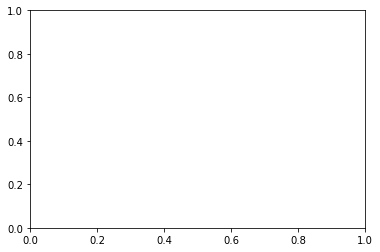

In [7]:
plotsdir = '/Users/billiemeadowcroft/Documents/PHD/Dumbbells/plots/Experiments/'
fig,ax = plt.subplots()
seeds = "3 7 14 17 18 23 28 29".split()
tauCD = []
tauDH = []
tauHJ = []
tauJK = []
for i in range(8):
    d = pandas.read_csv(datadir + "pathwaysInitRat/theta_d_0.15_3.0_"+str(seeds[i])+"_21_2.5.dat", header = None, sep=' ')[2]
    te = pandas.read_csv(datadir + "pathwaysInitRat/theta_d_0.15_3.0_"+str(seeds[i])+"_21_2.5.dat", header = None, sep=' ')[1]
    distance = []
    theta = []
    for j in range(len(d)):
        if d[j]< 25.1 and d[j]> 12: #dumbbell either inside of outside membrane, not attached
            distance.append(d[j])
            theta.append(180-te[j]*180/np.pi)
    
    z = np.arange(len(distance))
    last_int = len(theta)
    
#------------- State C is at time = 8, let's fetch where state D is-------------------#
    for t in range(8,last_int):
        if theta[t] < 72:
            stateDtime = t
            break
#------------- let's fetch where state H is-------------------#
    for t in range(stateDtime,last_int):
        if theta[t] < 60 and distance[t] <13:
            stateHtime = t
            break
#------------- let's fetch where state J is-------------------#
    for t in range(stateHtime,last_int):
        if theta[t] < 50:
            stateJtime = t
            break
#------------- let's fetch where state K is-------------------#
    for t in range(stateJtime,last_int):
        if distance[t]<12.1:
            stateKtime = t
            break
    #print(stateDtime-8)
    
    tauCD.append(stateDtime-8)
    tauDH.append(stateHtime-stateDtime)
    tauHJ.append(stateJtime-stateHtime)
    tauJK.append(stateKtime-stateJtime)
    
avtauCD = np.mean(tauCD)
avtauDH = np.mean(tauDH)
avtauHJ = np.mean(tauHJ)
avtauJK = np.mean(tauJK)

stdtauCD = np.std(tauCD)
stdtauDH = np.std(tauDH)
stdtauHJ = np.std(tauHJ)
stdtauJK = np.std(tauJK)

ax.bar(0,avtauCD, yerr = stdtauCD, color = 'plum', label = r'$\Delta\tau_{\mathrm{CD}}$')
ax.bar(1,avtauDH, yerr = stdtauDH, color = 'mediumpurple', label = r'$\Delta\tau_{\mathrm{DH}}$')
ax.bar(2,avtauHJ, yerr = stdtauHJ, color = 'royalblue', label = r'$\Delta\tau_{\mathrm{HJ}}$')
ax.bar(3,avtauJK, yerr = stdtauJK, color = 'teal', label = r'$\Delta\tau_{\mathrm{JK}}$')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels([r'$\Delta\tau_{\mathrm{CD}}$',r'$\Delta\tau_{\mathrm{DH}}$',r'$\Delta\tau_{\mathrm{HJ}}$',r'$\Delta\tau_{\mathrm{JK}}$' ], fontsize = 12)
ax.set_ylabel(r'Time between states [$\Delta T$]', fontsize = 12)
#fig.savefig('./plots/LargeVesc/LargeVesc2/TimeBetwStates.png')
#fig.savefig('./plots/size2.5Eps21/TimeBetwStates.pdf')